In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 144
plt.rcParams['font.family']=['Arial Unicode MS']
sns.set()
sns.set_style("whitegrid")

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [5]:
num_epochs = 2
num_classes = 10
batch_size = 64
learning_rate = 0.001

In [6]:
train_dataset = torchvision.datasets.MNIST(root='../../dataset/mnist/',
                                          train=True,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [7]:
test_dataset = torchvision.datasets.MNIST(root='../../dataset/mnist/',
                                          train=False,
                                          transform=transforms.ToTensor(),
                                          download=True)

In [8]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                          batch_size=batch_size,
                                          shuffle=True)

In [9]:
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

In [10]:
class Cnn(nn.Module):
    def __init__(self, num_classes=10):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(7*7*32, num_classes)
    
    def forward(self, x):
        y = self.layer1(x)
        y = self.layer2(y)
        y = y.reshape(y.size(0), -1)
        y = self.fc(y)
        return y

In [11]:
model = Cnn(num_classes).to(device)

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
total_step = len(train_loader)

In [14]:
idx = []
losses = []
for epoch in range(num_epochs):
    print("Epoch [{}/{}]".format(epoch + 1, num_epochs))
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i + 1) % batch_size == 0:
            print("\tStep [{:03d}/{}], Loss {:.4f}".format(i + 1, total_step, loss.item()))
            idx.append((epoch - 1) * total_step + i + 1)
            losses.append(loss.item())

Epoch [1/2]
	Step [064/938], Loss 0.2563
	Step [128/938], Loss 0.2522
	Step [192/938], Loss 0.3318
	Step [256/938], Loss 0.0649
	Step [320/938], Loss 0.0854
	Step [384/938], Loss 0.0632
	Step [448/938], Loss 0.1541
	Step [512/938], Loss 0.0415
	Step [576/938], Loss 0.0388
	Step [640/938], Loss 0.1029
	Step [704/938], Loss 0.0453
	Step [768/938], Loss 0.1052
	Step [832/938], Loss 0.0581
	Step [896/938], Loss 0.0624
Epoch [2/2]
	Step [064/938], Loss 0.0367
	Step [128/938], Loss 0.0533
	Step [192/938], Loss 0.0559
	Step [256/938], Loss 0.0955
	Step [320/938], Loss 0.0739
	Step [384/938], Loss 0.1390
	Step [448/938], Loss 0.1301
	Step [512/938], Loss 0.0076
	Step [576/938], Loss 0.1334
	Step [640/938], Loss 0.0095
	Step [704/938], Loss 0.0119
	Step [768/938], Loss 0.0136
	Step [832/938], Loss 0.0220
	Step [896/938], Loss 0.0376


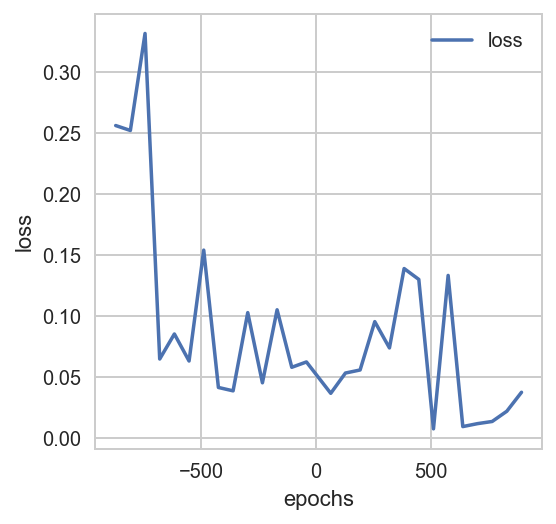

In [15]:
plt.plot(idx, losses, label="loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

In [16]:
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        pred = outputs.argmax(1)
        total += labels.size(0)
        correct += (pred == labels).sum()
    acc = correct.item() / total
    print("After {:5d} tests, accuracy is  : {:5f}".format(total, acc))

After 10000 tests, accuracy is  : 0.984400
